In [1]:
import urllib.request
import librosa
from IPython import display

file_name = "2776.mp3"  # Source: https://bigsoundbank.com/detail-2776-cockatiel-parakeet-8.html
url = f"https://bigsoundbank.com/UPLOAD/mp3/{file_name}"

urllib.request.urlretrieve(url, file_name)
sound_data, samplerate = librosa.load(file_name)  # sr=None keeps the original sample rate
print(samplerate)

display.display(display.Audio(data=sound_data, rate=samplerate))


22050


Sample Rate: 22050 Hz
Duration: 5.74 seconds


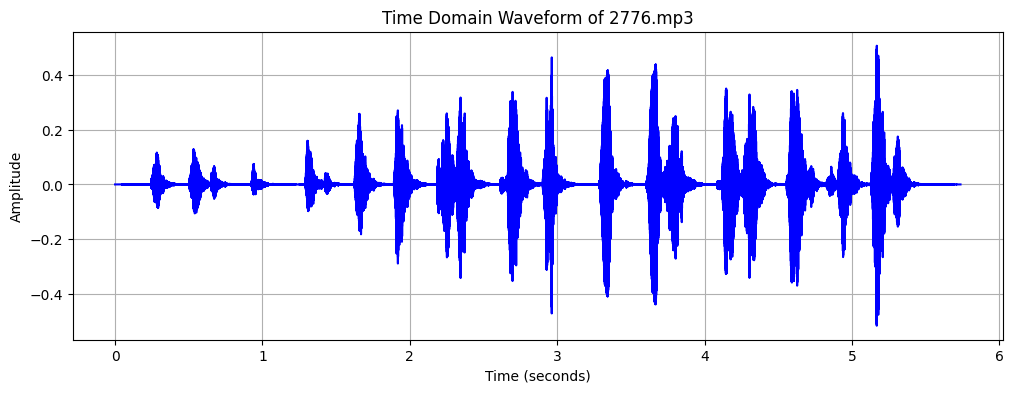

In [4]:
import urllib.request
import librosa
import matplotlib.pyplot as plt
import numpy as np


file_name = "2776.mp3"
url = f"https://bigsoundbank.com/UPLOAD/mp3/{file_name}"

# Download
print(f"Downloading {file_name}...")
urllib.request.urlretrieve(url, file_name)

# Load
sound_data, samplerate = librosa.load(file_name) 

print(f"Sample Rate: {samplerate} Hz")
print(f"Duration: {librosa.get_duration(y=sound_data, sr=samplerate):.2f} seconds")

# --- Plotting the Data ---


time = np.linspace(0, len(sound_data) / samplerate, num=len(sound_data))

# plot
plt.figure(figsize=(12, 4)) # Set the size of the figure
plt.plot(time, sound_data, color='b') # Plot the amplitude (sound_data) vs time
plt.title(f'Time Domain Waveform of {file_name}')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show() 

Sample Rate: 22050 Hz
------------------------------


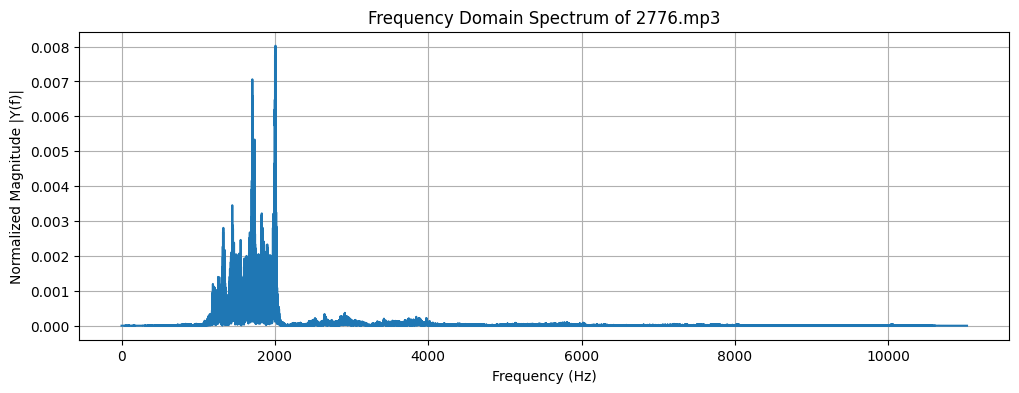

In [ ]:
import urllib.request
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# --- Setup---
file_name = "2776.mp3"
url = f"https://bigsoundbank.com/UPLOAD/mp3/{file_name}"

print(f"Downloading {file_name}...")
urllib.request.urlretrieve(url, file_name)

# Load the sound data (y: amplitude array, sr: sample rate)
sound_data, samplerate = librosa.load(file_name) 

print(f"Sample Rate: {samplerate} Hz")
print("-" * 30)

# --- Convert to Frequency Domain (FFT) ---

# Total number of sample points (N)
N = len(sound_data) 
# The duration of one sample (T), which is 1 / samplerate
T = 1.0 / samplerate 

# Calculate the Fast Fourier Transform (FFT)
yf = fft(sound_data)

# Calculate the frequency axis (xf)
# fftfreq provides the frequencies corresponding to the FFT output bins
xf = fftfreq(N, T)

# --- 3. Plot the Frequency Spectrum ---

# For a real signal, the spectrum is symmetric. 
# We only plot the positive frequencies, which is the first half of the data (N//2).
xf_positive = xf[:N//2]
yf_magnitude = 2.0/N * np.abs(yf[0:N//2]) # Calculate magnitude and normalize

# Create the plot
plt.figure(figsize=(12, 4))
plt.plot(xf_positive, yf_magnitude)
plt.title(f'Frequency Domain Spectrum of {file_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude |Y(f)|')
plt.grid(True)
plt.show()

In [ ]:
#what we can learn from it?
#The first (Dominant frequencies) thing we can learn from the plot is that peaks in the frequency domain correspond to dominant frequencies in the sound signal.
#For example, if we see a peak at 1000 Hz, it indicates that there is a significant component of the sound at that frequency.
#The height of the peaks indicates the strength of those frequencies in the original sound signal.
#also bandwidth of the sound is presented by the extent of spectrum.

#noise: the lowest level of the plot shows the amount of noise in out sound signal. plus any signal close to zero can be considered as DC offset.

Sample Rate: 22050 Hz
Processing N = 2205 samples with direct DFT...


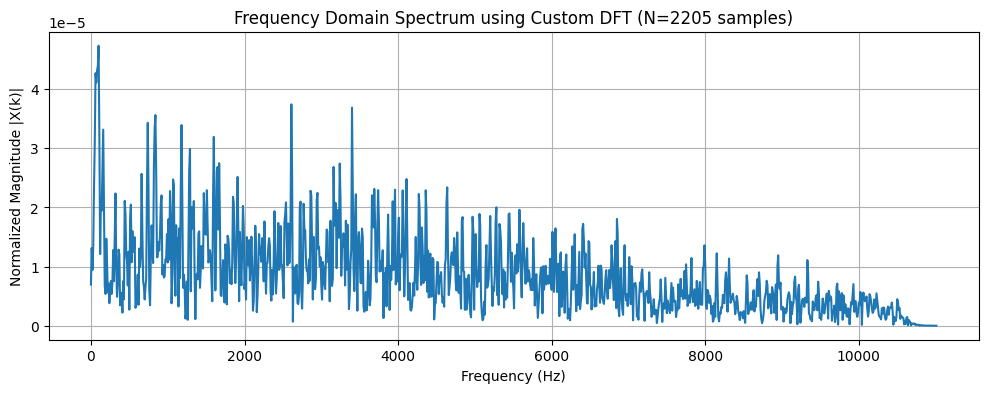

In [ ]:
#extra challenge

import urllib.request
import librosa
import numpy as np
import matplotlib.pyplot as plt

# getting the file again
file_name = "2776.mp3"
url = f"https://bigsoundbank.com/UPLOAD/mp3/{file_name}"

print(f"Downloading {file_name}...")
urllib.request.urlretrieve(url, file_name)

# Load the sound data
sound_data, samplerate = librosa.load(file_name, duration=0.1) 
print(f"Sample Rate: {samplerate} Hz")

# Total number of sample points (N)
N = len(sound_data) 
print(f"Processing N = {N} samples with direct DFT...")

#Custom DFT Function

def direct_dft(x):
    
    N = len(x)
    # k is the index for frequency (0 to N-1)
    k_indices = np.arange(N)
    # n is the index for time (0 to N-1)
    n_indices = np.arange(N)
    

    exponent_matrix = np.exp(-2j * np.pi * k_indices[:, None] * n_indices / N)
    
    # Matrix multiplication N x N] * [N x 1] -> [N x 1] 
    X_k = np.dot(exponent_matrix, x)
    
    return X_k


dft_output = direct_dft(sound_data)


T = 1.0 / samplerate # sample spacing

xf = np.fft.fftfreq(N, T)




xf_positive = xf[:N//2]
dft_magnitude = 2.0/N * np.abs(dft_output[0:N//2]) # magnitude and normalize

plt.figure(figsize=(12, 4))
plt.plot(xf_positive, dft_magnitude)
plt.title(f'Frequency Domain Spectrum using Custom DFT (N={N} samples)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude |X(k)|')
plt.grid(True)
plt.show()